<a href="https://colab.research.google.com/github/dscoool/datastructure/blob/main/network_optimization_example_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An example of Network Optimization (Airlines)

## Import the ***libraries*** and ***dataset***

In [ ]:
# import the libraries & dataset
import pandas as pd
data = pd.read_excel('https://github.com/dscoool/datastructure/raw/main/dataset_airline_optimization_problem.xlsx')
data.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,ata,date
0,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946,16:30:00,18:37:00,18:07:00,19:56:00,2013-02-26
1,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076,14:45:00,17:47:00,14:59:00,18:01:00,2013-08-17
2,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402,18:15:00,21:25:00,18:12:00,20:55:00,2013-02-13
3,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626,21:15:00,23:53:00,21:22:00,23:39:00,2013-04-11
4,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422,18:35:00,21:55:00,18:32:00,21:45:00,2013-08-05


## Formulate the Network

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

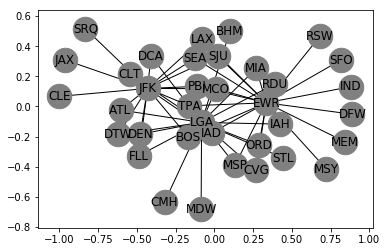

In [ ]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)
FG.nodes()
FG.edges()
nx.draw_networkx(FG, with_labels=True,node_size=600, node_color='gray')
nx.algorithms.degree_centrality(FG)
nx.density(FG)
nx.average_shortest_path_length(FG)
nx.average_degree_connectivity(FG)

## Shortest path between JFK to DFW

In [ ]:
# Let us find the dijkstra path from JAX to DFW.
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
print('Dijkstra path: ', dijpath)

# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
print('dijkstra path weighted by airtime:', shortpath)

# nx.draw(FG)
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
  #print(path)
  pass
# You can read more in-depth on how dijkstra works from this resource - https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf
#Note:  this code is inspired by www.analyticsvidhya.com /blog/2018/04/introduction-to-graph-theory-network-analysis-python

Dijkstra path:  ['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
dijkstra path weighted by airtime: ['JAX', 'JFK', 'BOS', 'EWR', 'DFW']
